# 변동성 모멘텀 혼합 전략

- 포트폴리오 유니버스
    - 포트폴리오 구성 : 주식 / 채권 / 현금군으로 구성
    - 주식 : 한국 주식(코스피200), 미국 주식(S&P500)
    - 채권 : 한국 10년 국채, 미국 10년 국채
    - 현금 : 한국 3년 만기 국고채
    - kodex200, us500_UH, kbond10y, usbond10y_UH, kbond3y
    - 기간 : 2003.6 ~ 2017.6
- 방법 : 절대 모멘텀 + 변동성 전략
    - 포트폴리오 개별 구성 종목의 1~12개월 **평균 모멘텀 계산**
    - **현금 비중** = (평균 모멘텀 값 < 1 자산 개수) / (전체 포트폴리오 자산 개수)
    - **포트폴리오 투자 비중** = 1 - 현금 비중
    - 개별 구성 종목의 변동성 = 1개월 수익률의 **최근 12개월 표준 편차**
    - 개별 종목 투자 비중 = (평균 모멘텀 / 변동성) x 포트폴리오 투자 비중(평균 모멘텀 < 1인 종목은 투자 안함)
    - 매월 리밸런싱
- 예제
    - A, B, C 3가지 자산으로 구성된 포트폴리오가 있다. 이번 달의 투자비중을 구하시오
        - 평균 모멘텀 : 1.5(A), 0.8(B), 1.2(C)
        - 변동성 : 8%(A), 10%(B), 2%(C)
        - 현금비중 = 1/3 = 33%
            - 모멘텀이 1보다 작은 하락 추세에 있는 자산 개수/ 전체 자산 개수
        - 투자비중 = 67%
        - 평균 모멘텀/변동성 계산
            - A : 1.5/8=0.1875
            - B : 평균 모멘텀 < 1 -> 투자 안함
            - C : 1.2/2 = 0.6
        - 각 자산별 투자 비중
            - A : 0.1875/(0.1875+0.6) = 24%
            - C : 0.6/(0.1875+0.6) = 76%
        - 최종 투자 비중
            - 현금 : 33%
            - 투자 비중(67%)
                - A : 67 x 0.24 = 16%
                - B : 0%
                - C : 67 x 0.76 = 51%

In [1]:
from settings import *

## 데이타 읽기

In [2]:
df = get_data()

In [3]:
tickers = ['kodex200', 'kbond3y', 'kbond10y', 'us500_UH', 'usbond10y_UH']

In [4]:
df = df[tickers].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kodex200      5433 non-null   float64
 1   kbond3y       5433 non-null   float64
 2   kbond10y      5433 non-null   float64
 3   us500_UH      5433 non-null   float64
 4   usbond10y_UH  5433 non-null   float64
dtypes: float64(5)
memory usage: 254.7 KB


In [5]:
# 기간 : 2003.6 ~ 2017.6
s = '2002-6-27'
e = '2017-6-30'
start = '2003-6-28'

In [6]:
df['2002-1']

,kodex200,kbond3y,kbond10y,us500_UH,usbond10y_UH
Date,,,,,
2002-01-02,6415.358,56229.638,44129.216,2647.744,6021.490
2002-01-03,6439.586,56197.014,44044.691,2668.179,6019.607
2002-01-04,6631.279,56223.600,44053.795,2679.419,5998.176
2002-01-07,6655.449,56230.578,44063.950,2643.175,6001.636
2002-01-08,6489.679,56251.776,44073.058,2654.359,6034.780
2002-01-09,6646.934,56262.199,44082.167,2637.562,6046.003
2002-01-10,6403.023,56288.759,44091.279,2650.011,6092.461
2002-01-11,6402.624,56309.906,44100.393,2630.410,6142.773
2002-01-14,6571.785,56338.339,44110.559,2607.550,6134.368


In [7]:
s = '2001-1-31'
e = '2021-12-30'
# e = '2022-02-23'
start = '2002-2-1'

In [8]:
data = df[s:e].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5174 entries, 2001-01-31 to 2021-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kodex200      5174 non-null   float64
 1   kbond3y       5174 non-null   float64
 2   kbond10y      5174 non-null   float64
 3   us500_UH      5174 non-null   float64
 4   usbond10y_UH  5174 non-null   float64
dtypes: float64(5)
memory usage: 242.5 KB


## 전략 클래스 작성 WeighMomentumVolRatio

In [9]:
class WeighMomentumVolRatio(bt.Algo):
    """ 모멘텀 변동성 비중조절

    - 포트폴리오 개별 구성 종목의 1~12개월 평균 모멘텀 계산
    - 현금 비중 = (평균 모멘텀 값 < 1 자산 개수) / (전체 포트폴리오 자산 개수)
    - 포트폴리오 투자 비중 = 1- 현금비중
    - 개별 구성 종목의 변동성 = 1개월 수익률의 최근 12개월 표준편차
    - 개별 종목 투자 비중 = 평균 모멘텀 / 변동성 포트폴리오 투자 비중(평균 모멘텀 < 1 인 종목은 투자 안 함)
    - 매월 반복하며 리밸런싱
    """
    def __init__(self, months=12, cash_name='현금'):
        super(WeighMomentumVolRatio, self).__init__()
        self.lookback = months
        self.cash_name = cash_name

    # def avearge_momentum(self, t0, prices):
    #     momentums = 0
    #     for m in range(1, self.lookback+1):
    #         start = t0 - pd.DateOffset(months=m)
    #         prc = prices.loc[start:t0]
    #         momentum = prc.iloc[-1] / prc.iloc[0]
    #         momentums += momentum

    #     return momentums/self.lookback

    # def average_momentum_score(self, t0, prices):
    #     momentums_score = 0
    #     for m in range(1, self.lookback+1):
    #         start = t0 - pd.DateOffset(months=m)
    #         prc = prices.loc[start:t0]
    #         momentum_score = np.where(prc.calc_total_return() > 0, 1, 0)
    #         momentums_score += momentum_score

    #     return momentums_score / self.lookback

    def avearge_momentum(self, prc):
        momentums = 0
        for i in range(1, self.lookback+1):
            momentum = prc.iloc[-1] / prc.shift(i).iloc[-1]
            momentums += momentum

        return momentums/self.lookback


    def average_momentum_score(self, prc):
        ''' x : Series (DataFrame의 컬럼)
            x[-1] : 기준일. x의 현재값
            (오늘날짜/과거날짜 - 1) > 0 보다 크면 1, 아니면 0
            => 오늘날짜/과거날짜 > 1 => 오늘날짜 > 과거날짜  => x[-1] > x
        '''
        if len(prc) != (self.lookback+1):
            raise ValueError(f"must be resample('M').last(), {prc}")

        ams = pd.Series(dtype='float64')
        for c in prc.columns:
            ams[c] = np.mean(np.where(prc[c][-1]>prc[c], 1, 0)[:-1])# 당일 날짜 비교는 제외해준다 [:-1]

        return ams


    def __call__(self, target):
        """
        - 포트폴리오 개별 구성 종목의 1~12개월 평균 모멘텀 계산
        - 현금 비중 = (평균 모멘텀 값 < 1 자산 개수) / (전체 포트폴리오 자산 개수)
        - 포트폴리오 투자 비중 = 1- 현금비중
        - 개별 구성 종목의 변동성 = 1개월 수익률의 최근 12개월 표준편차
        - 개별 종목 투자 비중 = 평균 모멘텀 / 변동성 포트폴리오 투자 비중(평균 모멘텀 < 1 인 종목은 투자 안 함)
        - 매월 반복하며 리밸런싱
        """
        selected = target.temp['selected'].copy()
        selected.remove(self.cash_name)

        prev_month = target.now - pd.DateOffset(months=1)
        t0 = prev_month.strftime("%Y-%m")
        start = (prev_month - pd.DateOffset(months=self.lookback)).strftime("%Y-%m")

        prc = target.universe.loc[start:t0, selected].resample('M').last()
        print(f"\nprc : {target.now} {t0} ~ {start}") #{prc}

        # t0 = target.now - self.lag
        # start = t0 - pd.DateOffset(months=self.lookback)
        # prc = target.universe.loc[start:t0, selected]

        # if target.universe[selected].index[0] > start:
        #     return False

        평균모멘텀 = self.avearge_momentum(prc)
        현금비중 = (평균모멘텀 < 1).sum()/len(평균모멘텀) * 0.1
        포트폴리오투자비중 = 1 - 현금비중
        월별수익률 = prc.resample('M').last().pct_change().dropna()
        변동성 = 월별수익률.std()
        평균모멘텀_변동성 = 평균모멘텀.div(변동성)
        투자비중 = 평균모멘텀_변동성.div(평균모멘텀_변동성.sum())
        개별종목투자비중 = 투자비중*포트폴리오투자비중
        현금투자비중 = 1 - 개별종목투자비중.sum()
        print(f"prc {t0} ~ {start}")
        print(f"평균모멘텀 {len(평균모멘텀)} {평균모멘텀}")
        print(f"현금비중 {현금비중}")
        print(f"포트폴리오투자비중 {포트폴리오투자비중}")
        print(f"변동성 {변동성}")
        print(f"평균모멘텀.div(변동성) {평균모멘텀_변동성}")
        print(f"투자비중 {투자비중}")
        print(f"개별종목투자비중 {개별종목투자비중.sum()}\n{개별종목투자비중} ")
        print(f"현금투자비중 {현금투자비중}")

        weights = 개별종목투자비중
        if weights.sum() > 1: #XXX 2010-9-30에 비중이 1을 조금 넘어 현금에 "-"비중이 들어간다.
            weights[self.cash_name] = 0.0
        else:
            weights[self.cash_name] = 1 - weights.sum()

        target.temp['weights'] = weights

        return True

In [10]:
def strategy_momentum_vol(name, start, data, months=12, cash_name='현금'):
    s = bt.Strategy(name,
            [
                bt.algos.RunMonthly(run_on_end_of_period=False), # 월초
                bt.algos.RunAfterDate(start),
                bt.algos.SelectAll(),
                #-------------------------------------------
                WeighMomentumVolRatio(months, cash_name),
                #-------------------------------------------
                PrintTempWeights(),
                bt.algos.Rebalance()
            ]
    )
    return bt.Backtest(s, data, initial_capital=100000000.0)

## 백테스팅 실행

현금은 kbond3y

In [11]:
after_date = (datetime.strptime(start, '%Y-%m-%d') - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
after_date

'2002-01-31'

In [12]:
bt_모멘텀변동성 = strategy_momentum_vol("모멘텀변동성", after_date, data, 12, 'kbond3y')

In [13]:
r_모멘텀변동성 = bt.run(bt_모멘텀변동성)


prc : 2002-02-01 00:00:00 2002-01 ~ 2001-01
prc 2002-01 ~ 2001-01
평균모멘텀 4 kodex200       1.318
kbond10y       1.010
us500_UH       0.976
usbond10y_UH   1.028
Name: 2002-01-31 00:00:00, dtype: float64
현금비중 0.025
포트폴리오투자비중 0.975
변동성 kodex200       0.105
kbond10y       0.032
us500_UH       0.054
usbond10y_UH   0.031
dtype: float64
평균모멘텀.div(변동성) kodex200       12.568
kbond10y       31.474
us500_UH       17.927
usbond10y_UH   32.889
dtype: float64
투자비중 kodex200       0.132
kbond10y       0.332
us500_UH       0.189
usbond10y_UH   0.347
dtype: float64
개별종목투자비중 0.9750000000000001
kodex200       0.129
kbond10y       0.324
us500_UH       0.184
usbond10y_UH   0.338
dtype: float64 
현금투자비중 0.02499999999999991
2002-02-01 00:00:00 모멘텀변동성 kodex200:0.129 kbond10y:0.324 us500_UH:0.184 usbond10y_UH:0.338 kbond3y:0.025 

prc : 2002-03-04 00:00:00 2002-02 ~ 2001-02
prc 2002-02 ~ 2001-02
평균모멘텀 4 kodex200       1.436
kbond10y       1.026
us500_UH       0.976
usbond10y_UH   1.045
Name: 2002-02-28 00:00:00, 

## 성과 분석

In [14]:
start

'2002-2-1'

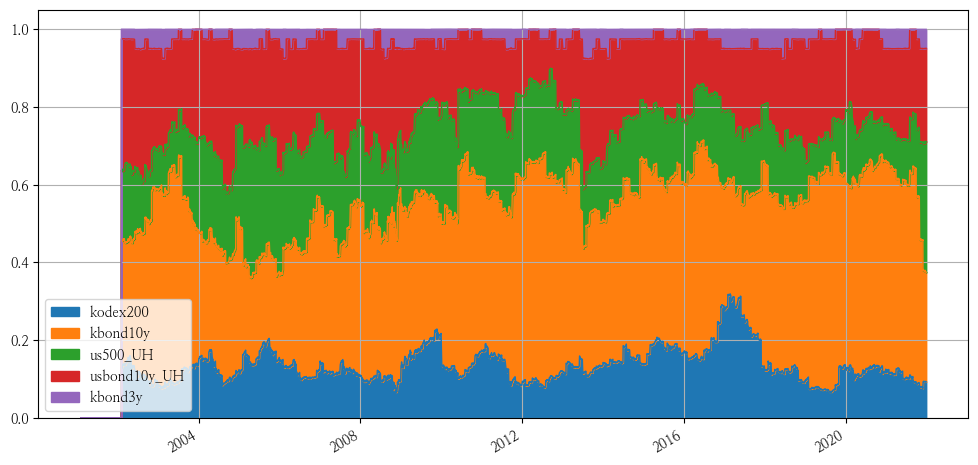

In [15]:
r_모멘텀변동성.set_date_range(start)
r_모멘텀변동성.get_security_weights().plot.area(figsize=(12,6));

In [16]:
r_모멘텀변동성.display()

Stat                 모멘텀변동성
-------------------  --------------
Start                2002-02-01
End                  2021-12-30
Risk-free rate       0.00%

Total Return         248.53%
Daily Sharpe         1.19
Daily Sortino        1.94
CAGR                 6.47%
Max Drawdown         -9.56%
Calmar Ratio         0.68

MTD                  1.81%
3m                   2.42%
6m                   3.06%
YTD                  5.52%
1Y                   5.52%
3Y (ann.)            6.79%
5Y (ann.)            5.59%
10Y (ann.)           5.88%
Since Incep. (ann.)  6.47%

Daily Sharpe         1.19
Daily Sortino        1.94
Daily Mean (ann.)    6.54%
Daily Vol (ann.)     5.51%
Daily Skew           -0.11
Daily Kurt           13.27
Best Day             4.08%
Worst Day            -3.47%

Monthly Sharpe       1.34
Monthly Sortino      2.74
Monthly Mean (ann.)  6.31%
Monthly Vol (ann.)   4.72%
Monthly Skew         -0.10
Monthly Kurt         1.12
Best Month           6.35%
Worst Month          -3.58%

Yearly

In [33]:
r_모멘텀변동성.prices.resample('MS').first().to_drawdown_series().min()*100

모멘텀변동성   -6.862
dtype: float64

In [18]:
assets =  ['kodex200', 'kbond10y', 'us500_UH', 'usbond10y_UH']
bt_ew = long_only_ew(data, assets, "동일비중")
bt_코스피200 = long_only_ew(data, ["kodex200"], "코스피200")
bt_us500 = long_only_ew(data, ["us500_UH"], "S&P500")
bt_kbond10y = long_only_ew(data, ["kbond10y"], "한국10년국채")
bt_usbond10y = long_only_ew(data, ["usbond10y_UH"], "미국10년국채")

In [19]:
r_ew = bt.run(bt_ew)
r_코스피200 = bt.run(bt_코스피200)
r_us500 = bt.run(bt_us500)
r_kbond10y = bt.run(bt_kbond10y)
r_usbond10y = bt.run(bt_usbond10y)
r_all = bt.run(bt_모멘텀변동성, bt_ew, bt_코스피200, bt_us500, bt_kbond10y, bt_usbond10y)

2001-01-31 00:00:00
2001-01-31 00:00:00
2001-01-31 00:00:00
2001-01-31 00:00:00
2001-01-31 00:00:00


In [20]:
r_all.set_date_range(start)
r_ew.set_date_range(start)
r_코스피200.set_date_range(start)
r_us500.set_date_range(start)
r_kbond10y.set_date_range(start)
r_usbond10y.set_date_range(start)

In [21]:
r_all.stats

,모멘텀변동성,동일비중,코스피200,S&P500,한국10년국채,미국10년국채
start,2002-02-01 00:00:00,2002-02-01 00:00:00,2002-02-01 00:00:00,2002-02-01 00:00:00,2002-02-01 00:00:00,2002-02-01 00:00:00
end,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00
rf,0.000,0.000,0.000,0.000,0.000,0.000
total_return,2.485,3.100,5.120,4.592,1.697,0.985
cagr,0.065,0.073,0.095,0.090,0.051,0.035
max_drawdown,-0.096,-0.205,-0.527,-0.399,-0.120,-0.293
calmar,0.677,0.359,0.181,0.226,0.427,0.120
mtd,0.018,0.038,0.065,0.040,-0.002,-0.003
three_month,0.024,0.022,-0.008,0.093,0.002,0.003
six_month,0.031,0.005,-0.091,0.178,-0.007,0.055


In [34]:
r_all.prices.resample('MS').last().to_drawdown_series().describe()*100

,모멘텀변동성,동일비중,코스피200,S&P500,한국10년국채,미국10년국채
count,23900.000,23900.000,23900.000,23900.000,23900.000,23900.000
mean,-0.827,-2.094,-9.972,-6.321,-2.318,-9.803
std,1.251,3.167,9.270,7.645,2.510,6.386
min,-6.562,-15.532,-45.511,-34.190,-10.819,-25.729
25%,-1.389,-2.978,-14.614,-10.603,-4.165,-14.857
50%,-0.027,-0.417,-8.518,-2.878,-1.644,-9.648
75%,0.000,0.000,-2.449,0.000,0.000,-4.637
max,0.000,0.000,0.000,0.000,0.000,0.000


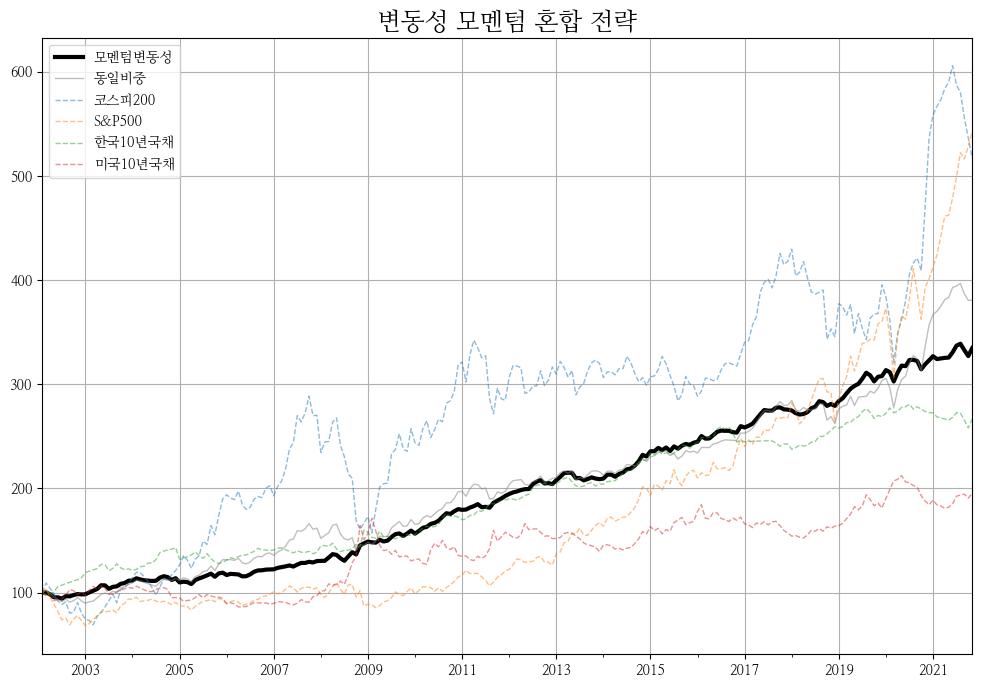

In [23]:
ax1 = r_모멘텀변동성.plot(freq='M', lw=3, color='black', figsize=(12,8));
r_ew.plot(ax=ax1, freq='M', lw=1, color="gray", alpha=0.5, figsize=(12, 8));
r_코스피200.plot(ax=ax1, freq='M', ls='--',  alpha=0.5, figsize=(12, 8));
r_us500.plot(ax=ax1, freq='M', ls='--', alpha=0.5, figsize=(12, 8));
r_kbond10y.plot(ax=ax1, freq='M', ls='--', alpha=0.5, figsize=(12, 8));
r_usbond10y.plot(ax=ax1, freq='M', ls='--', alpha=0.5, figsize=(12, 8));
plt.title("변동성 모멘텀 혼합 전략", size=18);

## 책과 데이터가 다르다.

         CAGR
모멘텀변동성  6.472
동일비중    7.345
코스피200  9.526
S&P500  9.031
한국10년국채 5.110
미국10년국채 3.504
            MDD
모멘텀변동성   -9.557
동일비중    -20.471
코스피200  -52.667
S&P500  -39.878
한국10년국채 -11.978
미국10년국채 -29.304


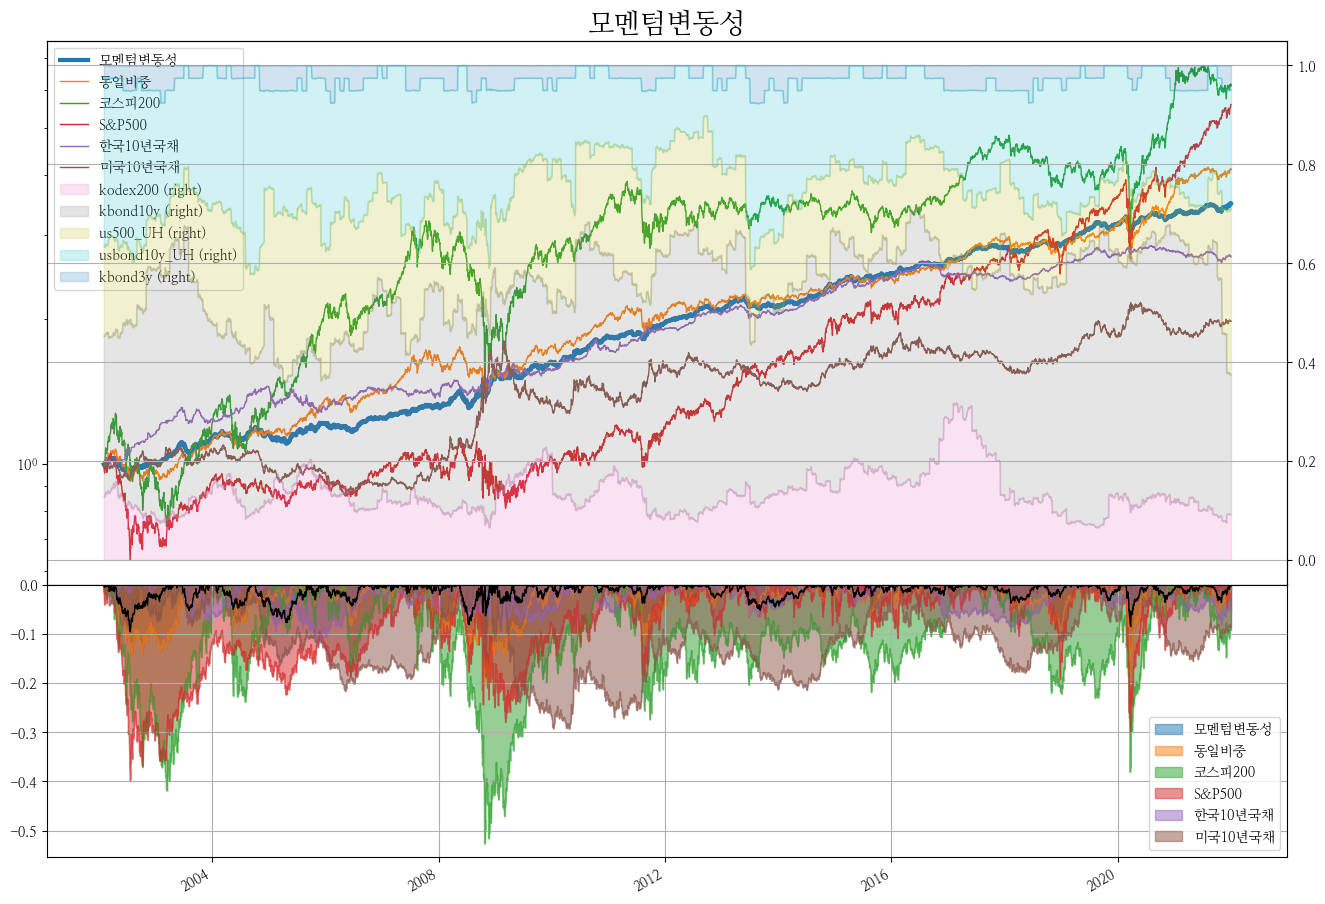

In [24]:
plot_assets(r_all, start, e, "모멘텀변동성")

          CAGR
모멘텀변동성   5.191
동일비중    14.199
코스피200  18.722
S&P500  24.483
한국10년국채 -0.630
미국10년국채  3.937
            MDD
모멘텀변동성   -8.474
동일비중    -18.414
코스피200  -34.644
S&P500  -29.699
한국10년국채  -8.152
미국10년국채 -15.587


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

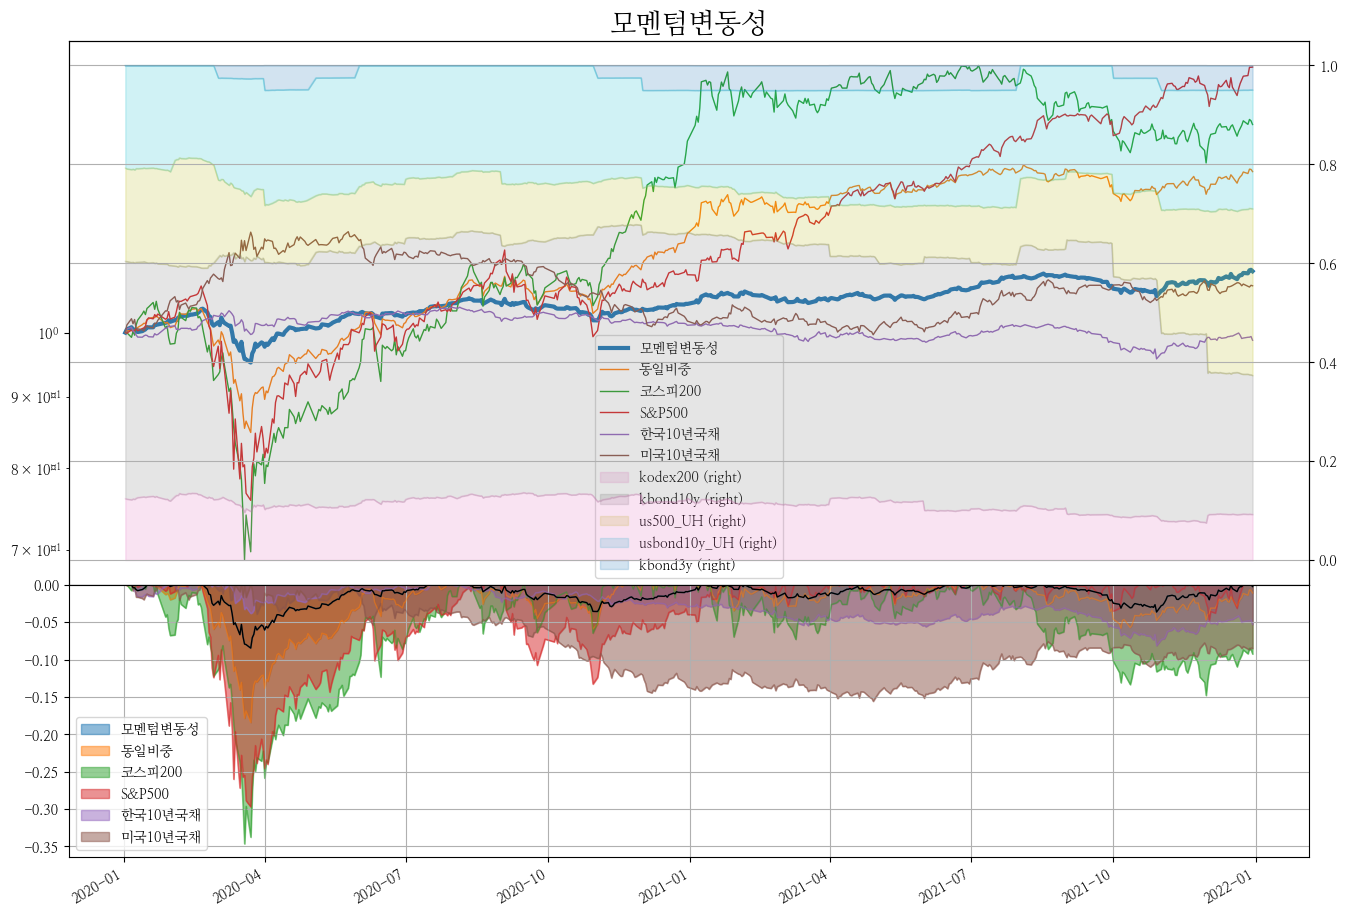

In [25]:
plot_assets(r_all, '2020', e, "모멘텀변동성")

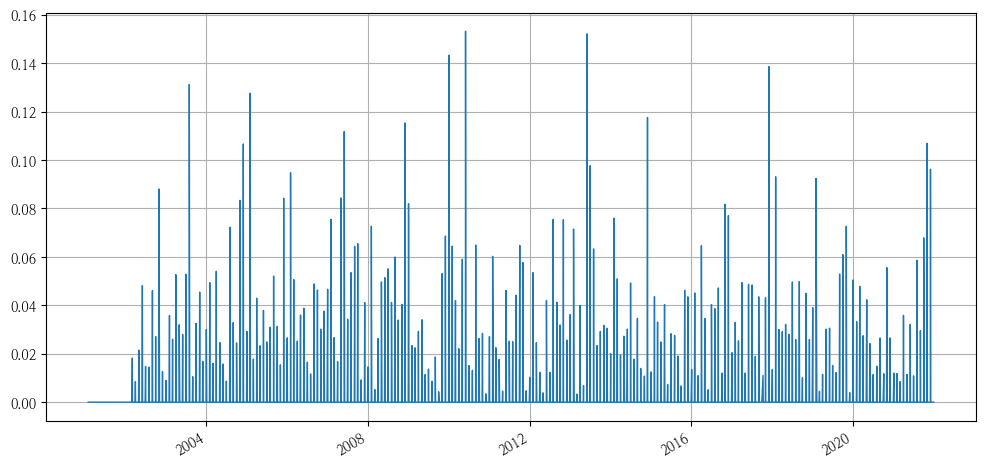

In [26]:
bt_모멘텀변동성.turnover.plot(figsize=(12,6));

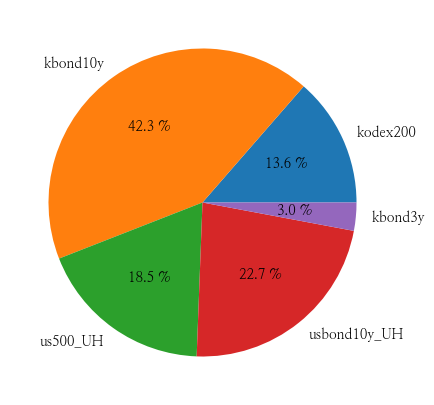

In [27]:
r_모멘텀변동성.get_security_weights().sum(axis=0).plot.pie(autopct='%.1f %%', ylabel='', figsize=(5,5));

In [28]:
r_all.backtests['모멘텀변동성'].stats.drawdown_details.sort_values(by="Length", ascending=False).head(20)

,Start,End,Length,drawdown
167,2013-05-20 00:00:00,2014-07-15 00:00:00,421,-0.052
4,2002-03-20 00:00:00,2003-03-18 00:00:00,363,-0.096
28,2004-10-07 00:00:00,2005-09-28 00:00:00,356,-0.077
234,2017-10-19 00:00:00,2018-07-12 00:00:00,266,-0.038
30,2005-11-28 00:00:00,2006-08-16 00:00:00,261,-0.043
23,2004-03-08 00:00:00,2004-09-13 00:00:00,189,-0.050
271,2020-08-12 00:00:00,2021-01-08 00:00:00,149,-0.036
262,2019-08-27 00:00:00,2020-01-21 00:00:00,147,-0.033
268,2020-02-24 00:00:00,2020-07-17 00:00:00,144,-0.085
70,2008-05-16 00:00:00,2008-10-06 00:00:00,143,-0.081


In [29]:
r_all.backtests['모멘텀변동성'].stats.drawdown_details.sort_values('drawdown').head(20)

,Start,End,Length,drawdown
4,2002-03-20 00:00:00,2003-03-18 00:00:00,363,-0.096
268,2020-02-24 00:00:00,2020-07-17 00:00:00,144,-0.085
70,2008-05-16 00:00:00,2008-10-06 00:00:00,143,-0.081
28,2004-10-07 00:00:00,2005-09-28 00:00:00,356,-0.077
72,2008-10-29 00:00:00,2008-11-26 00:00:00,28,-0.063
71,2008-10-09 00:00:00,2008-10-28 00:00:00,19,-0.057
12,2003-06-20 00:00:00,2003-11-03 00:00:00,136,-0.053
167,2013-05-20 00:00:00,2014-07-15 00:00:00,421,-0.052
23,2004-03-08 00:00:00,2004-09-13 00:00:00,189,-0.050
30,2005-11-28 00:00:00,2006-08-16 00:00:00,261,-0.043


2021-12-30 00:00:00
2020-12-30 00:00:00
-9.556621125538856 8.844867485625985


,cagr,mdd
2001-01-30,6.152,-9.557
2001-01-31,6.152,-9.557
2001-02-01,6.153,-9.557
2001-02-02,6.154,-9.557
2001-02-05,6.157,-9.557
...,...,...
2021-12-23,39.482,-0.240
2021-12-24,18.285,-0.240
2021-12-27,52.247,-0.240
2021-12-28,-24.879,-0.240


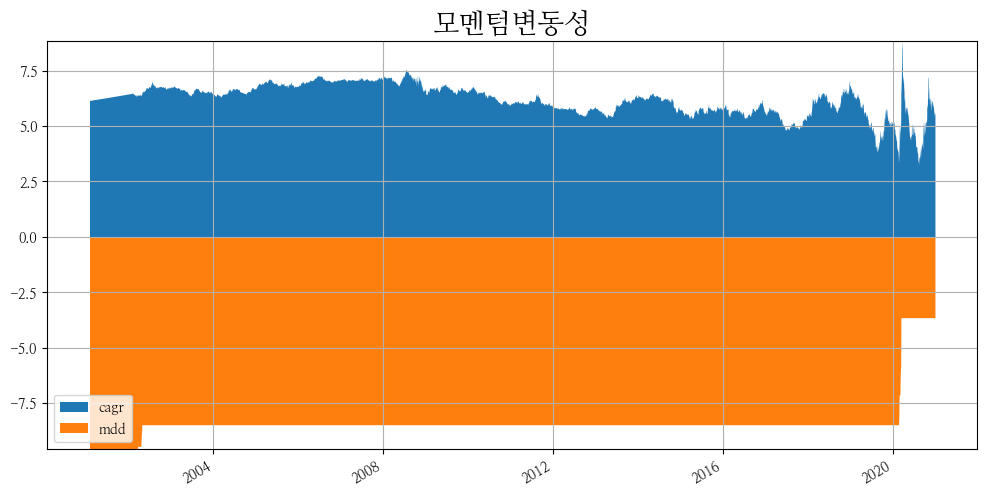

In [30]:
투자진입시점별CAGRMDD(bt_모멘텀변동성 , "모멘텀변동성")

                           Strategy
-------------------------  ----------
Start Period               2002-02-04
End Period                 2021-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          248.53%
CAGR﹪                     6.47%

Sharpe                     1.19
Smart Sharpe               1.11
Sortino                    1.74
Smart Sortino              1.62
Sortino/√2                 1.23
Smart Sortino/√2           1.15
Omega                      1.25

Max Drawdown               -9.56%
Longest DD Days            421
Volatility (ann.)          5.51%
Calmar                     0.68
Skew                       -0.11
Kurtosis                   13.27

Expected Daily %           0.03%
Expected Monthly %         0.52%
Expected Yearly %          6.44%
Kelly Criterion            10.85%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.55%
Expected Shortfall (cVaR)  -0.55%

Gain/Pain Ratio            0.25
Gain/Pain (1M)             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2002-03-20,2002-07-22,2003-03-18,363,-9.557,-8.780
2,2020-02-24,2020-03-23,2020-07-17,144,-8.474,-7.930
3,2008-05-16,2008-07-15,2008-10-06,143,-8.104,-7.995
4,2004-10-07,2005-04-28,2005-09-28,356,-7.709,-7.474
5,2008-10-29,2008-10-30,2008-11-26,28,-6.328,-5.743


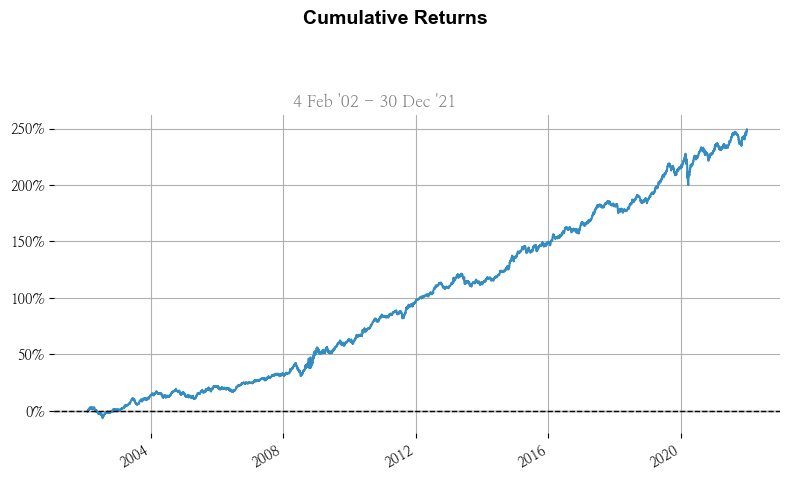

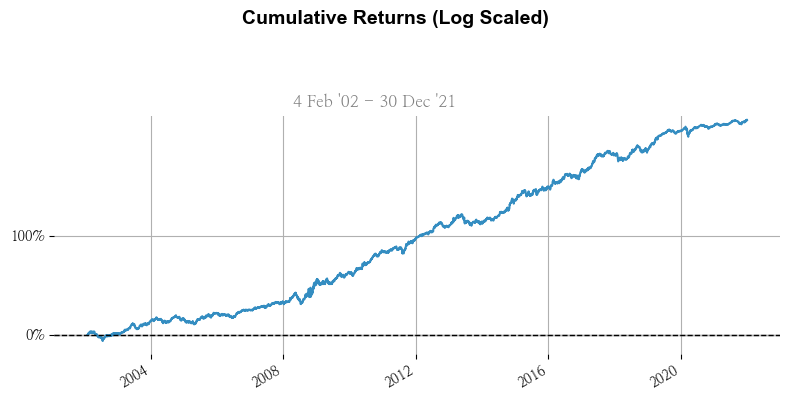

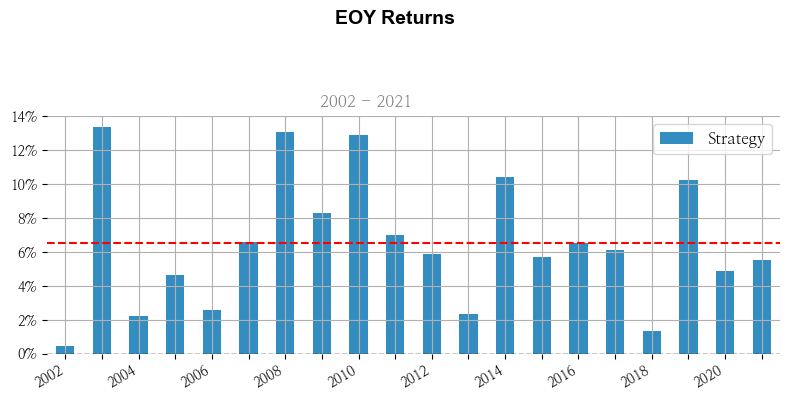

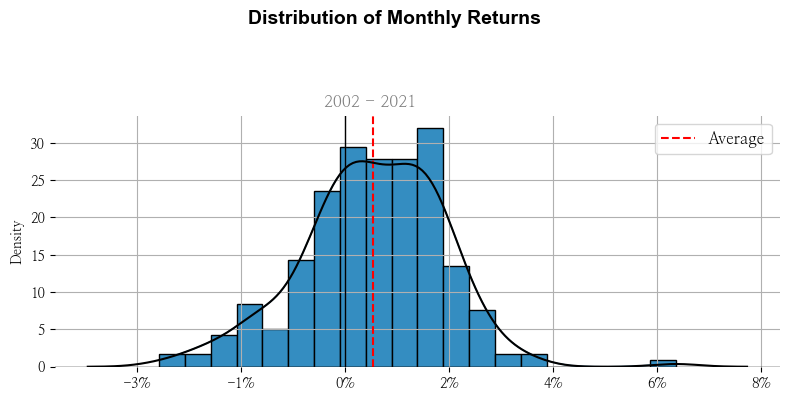

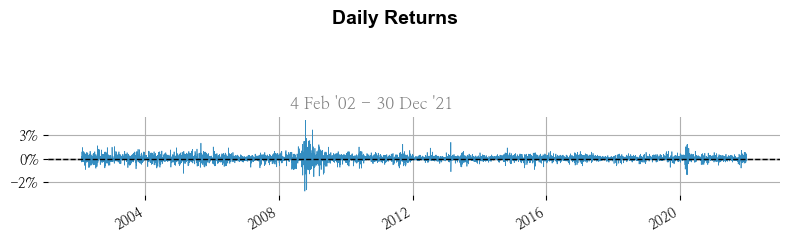

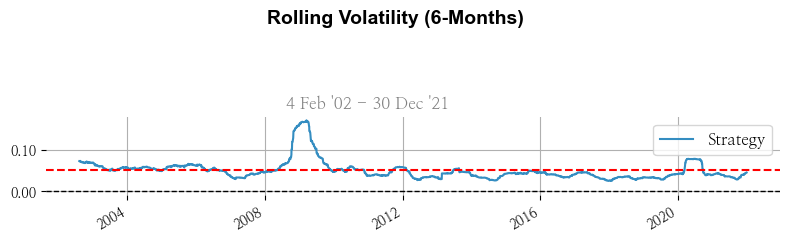

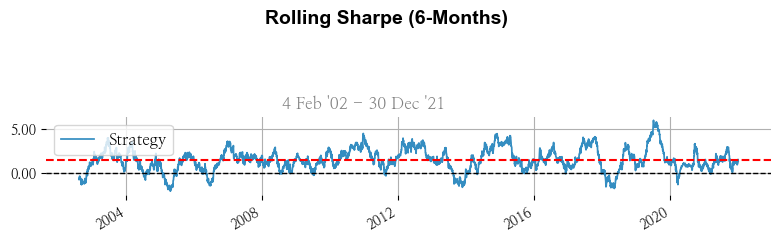

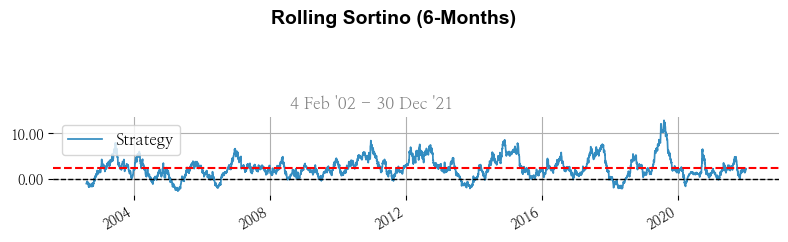

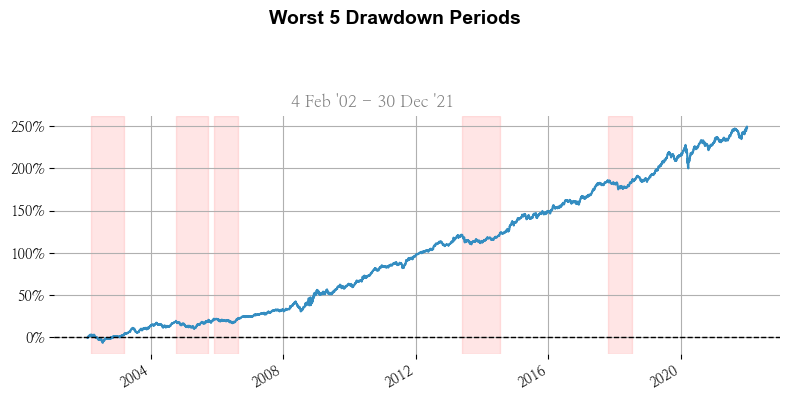

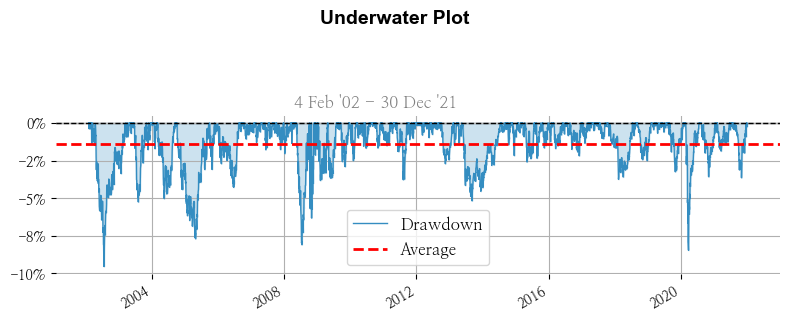

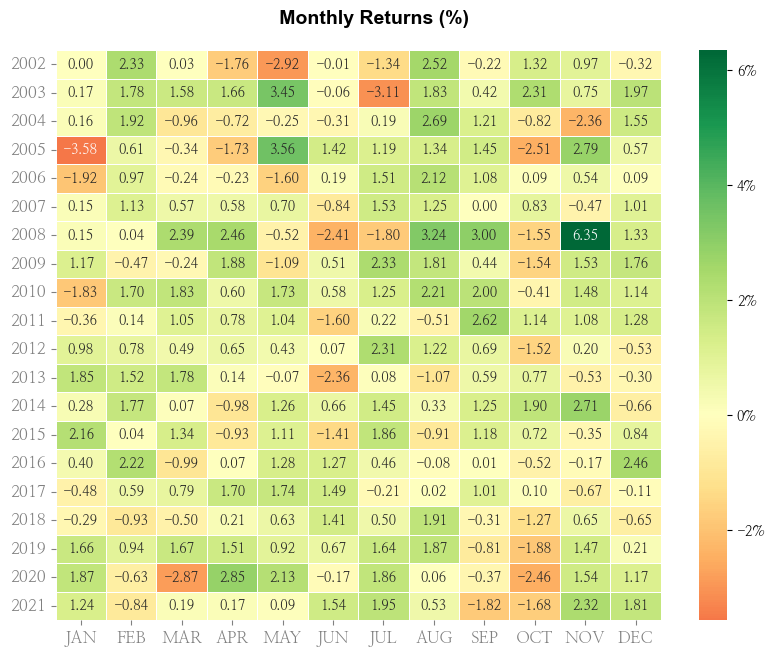

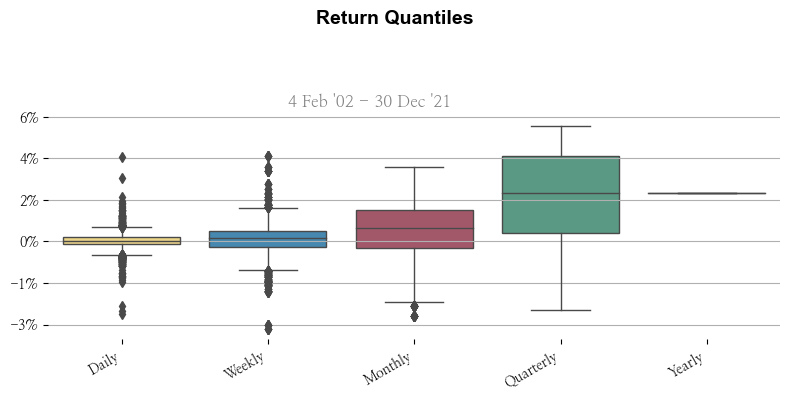

In [31]:
qs.reports.full(r_all.prices.loc[:,'모멘텀변동성'].pct_change().dropna())